<a href="https://colab.research.google.com/github/Biswa040/House_price/blob/main/Numpy__example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(25)
size = np.random.randint(500,5000,1000)
bed = np.random.randint(1,6,1000)
loc = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)
price = (size * 300) + (bed * 50000) + (loc * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)
df = pd.DataFrame({"SIZE":size, "BEDROOMS":bed,"LOCATIONS":loc,"AGE":age,"PRICE":price})
csv_file = "House_data.csv"
df.to_csv(csv_file, index=False)
print(f"Dataset saved as '{csv_file}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'House_data.csv' with 1000 rows and 5 columns.


In [ ]:
df=pd.read_csv("House_data.csv")
print(df.head()) # for top 5 rows

   SIZE  BEDROOMS  LOCATIONS  AGE    PRICE
0   818         3          3    1   469251
1  2691         3          6   47   973671
2  3434         1          8   38  1170719
3   755         5          2   48   431073
4  1675         5          7   26   854151


In [ ]:
print("\n Missing Values:\n", df.isnull().sum())
print("\n Dataset Summary:\n",df.describe())


 Missing Values:
 SIZE         0
BEDROOMS     0
LOCATIONS    0
AGE          0
PRICE        0
dtype: int64

 Dataset Summary:
               SIZE     BEDROOMS   LOCATIONS          AGE         PRICE
count  1000.000000  1000.000000  1000.00000  1000.000000  1.000000e+03
mean   2755.180000     2.956000     5.47000    25.811000  1.031821e+06
std    1309.939313     1.436707     2.88434    14.609062  4.039750e+05
min     510.000000     1.000000     1.00000     1.000000  1.486360e+05
25%    1565.500000     2.000000     3.00000    13.000000  6.906732e+05
50%    2781.500000     3.000000     5.00000    26.000000  1.039898e+06
75%    3856.000000     4.000000     8.00000    38.000000  1.374959e+06
max    4990.000000     5.000000    10.00000    50.000000  1.880634e+06


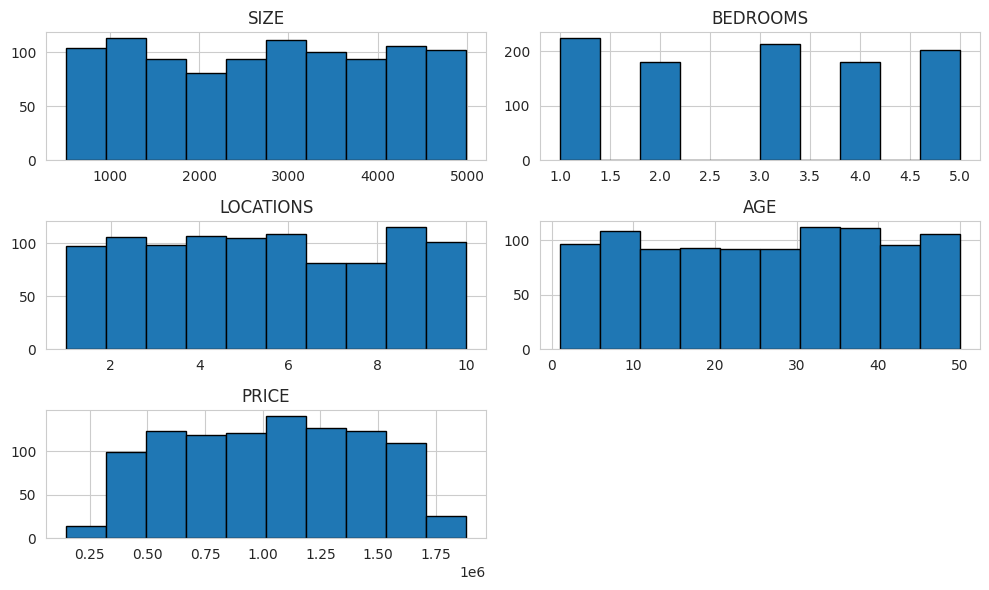

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df.hist(figsize=(10,6),bins=10,edgecolor="black")
plt.tight_layout()
plt.show()

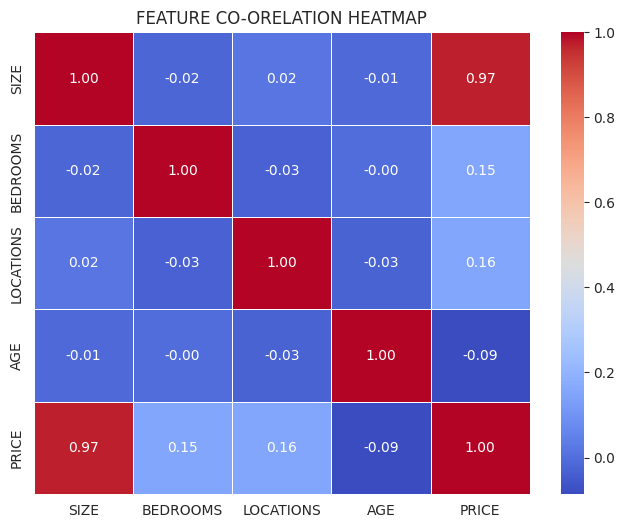

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.title("FEATURE CO-ORELATION HEATMAP")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
x = df[["SIZE","BEDROOMS","LOCATIONS","AGE"]]
y = df["PRICE"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMODEL PERFORMANCE:\nMAR: {mae:.2f},R2 score: {r2:.2f}")


MODEL PERFORMANCE:
MAR: 9346.81,R2 score: 1.00


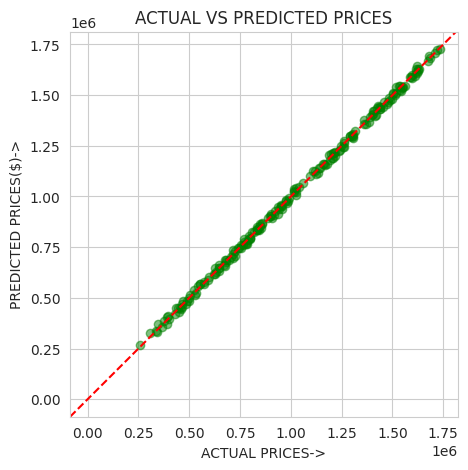

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.xlabel("ACTUAL PRICES->")
plt.ylabel("PREDICTED PRICES($)->")
plt.title("ACTUAL VS PREDICTED PRICES")
plt.axline([0,0],slope=1,color ="red", linestyle="--")
plt.show()